In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from google.colab import drive
from sklearn.metrics import roc_auc_score, roc_curve 
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/Default_train.csv')
df

Mounted at /content/drive


,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,626432,63213,105405,60.72,34,20700,48,1050,01-08-88,Salaried,...,0,0,4084,0,0,0,1yrs 9mon,3yrs 3mon,0,0
233150,606141,73651,100600,74.95,34,23775,51,990,05-12-88,Self employed,...,0,0,1565,0,0,0,0yrs 6mon,0yrs 6mon,0,0
233151,613658,33484,71212,48.45,77,22186,86,2299,01-06-76,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
233152,548084,34259,73286,49.10,77,22186,86,2299,26-03-94,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0


In [ ]:
df.iloc[150:200,25:]

,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
150,48579,48579,0,0,0,0,0,0,2785,0,1,0,0yrs 7mon,1yrs 1mon,0,0
151,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
152,351003,285648,0,0,0,0,0,0,0,0,2,1,3yrs 0mon,11yrs 0mon,0,0
153,0,0,0,0,0,0,0,0,1475,0,0,0,0yrs 9mon,0yrs 9mon,0,0
154,0,0,2,2,1,1171994,1690000,1690000,1090,9382,0,0,3yrs 1mon,5yrs 0mon,0,0
155,1163250,1163250,0,0,0,0,0,0,13050,0,2,0,0yrs 9mon,1yrs 7mon,1,0
156,66950,66950,0,0,0,0,0,0,4037,0,3,0,0yrs 2mon,0yrs 9mon,0,0
157,38950,7960,0,0,0,0,0,0,1464,0,2,1,0yrs 8mon,2yrs 1mon,1,1
158,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
159,15000,0,0,0,0,0,0,0,0,0,0,0,0yrs 6mon,0yrs 6mon,0,0


In [ ]:
df.duplicated().sum() 
df.isna().sum()
df.dtypes
df.describe().style.background_gradient(cmap = 'Pastel2')
df.hist(figsize = (15,15))
df.boxplot(figsize = (15,15), rot = 45)

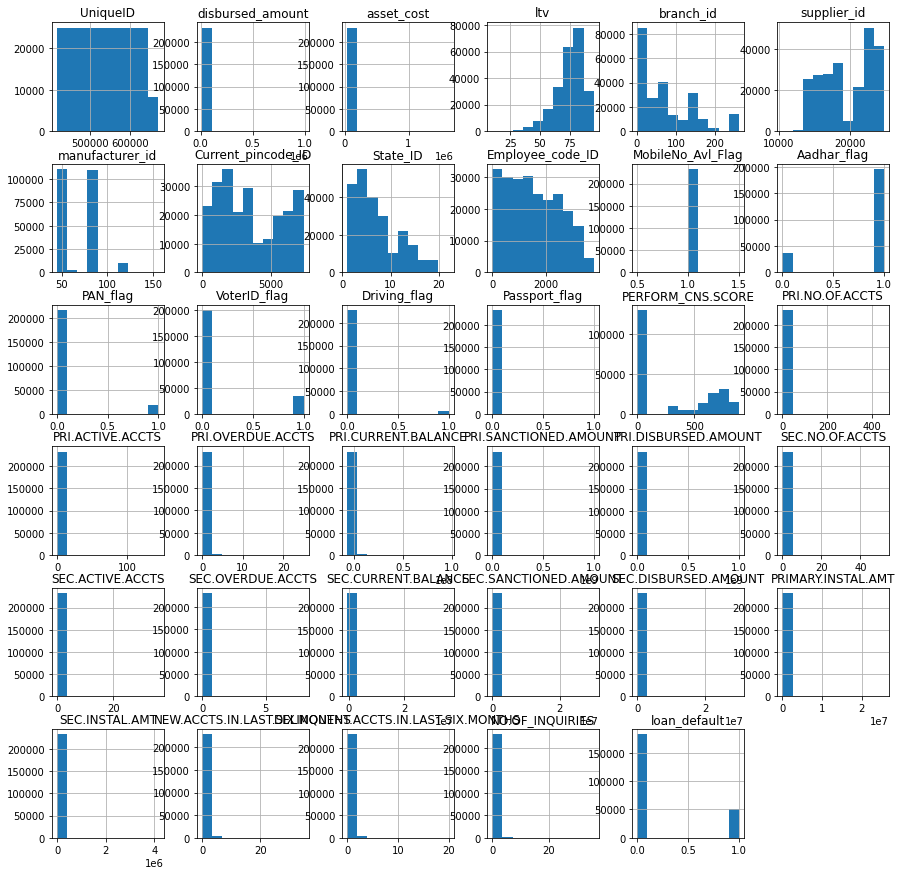

In [ ]:
df.describe().style.background_gradient(cmap = 'Pastel2')# пропущенные значения в Employment.Type

df.hist(figsize = (15,15))# проверили на дубликаты их нету 

df.boxplot(figsize = (15,15), rot = 45)

In [ ]:
df.info()

UniqueID                                 int64
disbursed_amount                         int64
asset_cost                               int64
ltv                                    float64
branch_id                                int64
supplier_id                              int64
manufacturer_id                          int64
Current_pincode_ID                       int64
Date.of.Birth                           object
Employment.Type                         object
DisbursalDate                           object
State_ID                                 int64
Employee_code_ID                         int64
MobileNo_Avl_Flag                        int64
Aadhar_flag                              int64
PAN_flag                                 int64
VoterID_flag                             int64
Driving_flag                             int64
Passport_flag                            int64
PERFORM_CNS.SCORE                        int64
PERFORM_CNS.SCORE.DESCRIPTION           object
PRI.NO.OF.ACC

In [ ]:
df['disbursed_amount_log'] = np.log(df['disbursed_amount']) / np.log(100)
df['asset_cost_log'] = np.log(df['asset_cost']) / np.log(100)
df['PRI.CURRENT.BALANCE.log'] = np.log(df['PRI.CURRENT.BALANCE']) / np.log(100)
df['PRI.SANCTIONED.AMOUNT.log'] = np.log(df['PRI.SANCTIONED.AMOUNT']) / np.log(100)
df['PRI.DISBURSED.AMOUNT.log'] = np.log(df['PRI.DISBURSED.AMOUNT']) / np.log(100)
df['PRIMARY.INSTAL.AMT.log'] = np.log(df['PRIMARY.INSTAL.AMT']) / np.log(100)

df = df.replace({-np.inf: -1})

df = df.drop(['SEC.SANCTIONED.AMOUNT', 'SEC.INSTAL.AMT'], axis = 1) # удаляем потому что очень мало не нулевых значений
df = df.drop(['PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'disbursed_amount', 'asset_cost'], axis = 1)

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
df['AVERAGE.ACCT.AGE.YEAR'] = df['AVERAGE.ACCT.AGE'] 
df['AVERAGE.ACCT.AGE.MON'] = df['AVERAGE.ACCT.AGE']
df['CREDIT.HISTORY.LENGTH.YEAR'] = df['CREDIT.HISTORY.LENGTH']
df['CREDIT.HISTORY.LENGTH.MON'] = df['CREDIT.HISTORY.LENGTH']

for i in range(0, df.shape[0]): 
  df.loc[i, 'AVERAGE.ACCT.AGE.YEAR'] = (int(df['AVERAGE.ACCT.AGE.YEAR'][i].split(sep = 'yrs ')[0])) * 12
  df.loc[i, 'AVERAGE.ACCT.AGE.MON'] = int(df['AVERAGE.ACCT.AGE.MON'][i][:-3].split(sep = 'yrs ')[1])
  df.loc[i, 'CREDIT.HISTORY.LENGTH.YEAR'] = (int(df['CREDIT.HISTORY.LENGTH.YEAR'][i].split(sep = 'yrs ')[0])) * 12
  df.loc[i, 'CREDIT.HISTORY.LENGTH.MON'] = int(df['CREDIT.HISTORY.LENGTH.MON'][i][:-3].split(sep = 'yrs ')[1])
  
df['AVER.ACCT.AGE.MON'] = df['AVERAGE.ACCT.AGE.YEAR'] + df['AVERAGE.ACCT.AGE.MON']
df['CRED.HIST.LENGTH.MON'] = df['CREDIT.HISTORY.LENGTH.YEAR'] + df['CREDIT.HISTORY.LENGTH.MON']

df = df.drop(['AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'AVERAGE.ACCT.AGE.YEAR', 'AVERAGE.ACCT.AGE.MON', 'CREDIT.HISTORY.LENGTH.YEAR', 'CREDIT.HISTORY.LENGTH.MON'], axis = 1)

df['AVER.ACCT.AGE.MON'] = df['AVER.ACCT.AGE.MON'].astype(float)
df['CRED.HIST.LENGTH.MON'] = df['CRED.HIST.LENGTH.MON'].astype(float)

In [ ]:
df = df.drop(['AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH'], axis = 1)

In [ ]:
df = df[['loan_default'] + [x for x in df.columns if x != 'loan_default']] 

df[['Date.of.Birth', 'DisbursalDate']] = df[['Date.of.Birth', 'DisbursalDate']].apply(pd.to_datetime) 
df['Age_Disbursalmoment'] = df['DisbursalDate'] - df['Date.of.Birth']  
df['Age_Disbursalmoment'] = df['Age_Disbursalmoment'].apply(lambda x: x.days) # перевели этот возраст на количество дней 
df['Age_Disbursalmoment'] = np.where((df['Age_Disbursalmoment'] < 0), df['Age_Disbursalmoment'] + 36530, df['Age_Disbursalmoment']) # в столбце где не правильно посчитало возраст добавили по 100 лет

df = df.drop(['UniqueID', 'DisbursalDate', 'Date.of.Birth'], axis = 1) # удаляем столбцы за ненадобностью 

In [ ]:
df['PERFORM_CNS.SCORE.DESCRIPTION'] = df['PERFORM_CNS.SCORE.DESCRIPTION'].astype('category')  
df['PERFORM_CNS.SCORE.DESCRIPTION'] = df['PERFORM_CNS.SCORE.DESCRIPTION'].cat.codes 

df = pd.get_dummies(df,columns = ['Employment.Type'], drop_first= True, dummy_na = True) 

In [ ]:
col = df.columns
colm = []
for i in col: 
  if (len(df[i].unique()) <= 2):
    if df[i].mean() < 0.05 or (len(df[i].unique()) == 1):  
     colm.append(i)
     
df = df.drop(colm, axis = 1) 


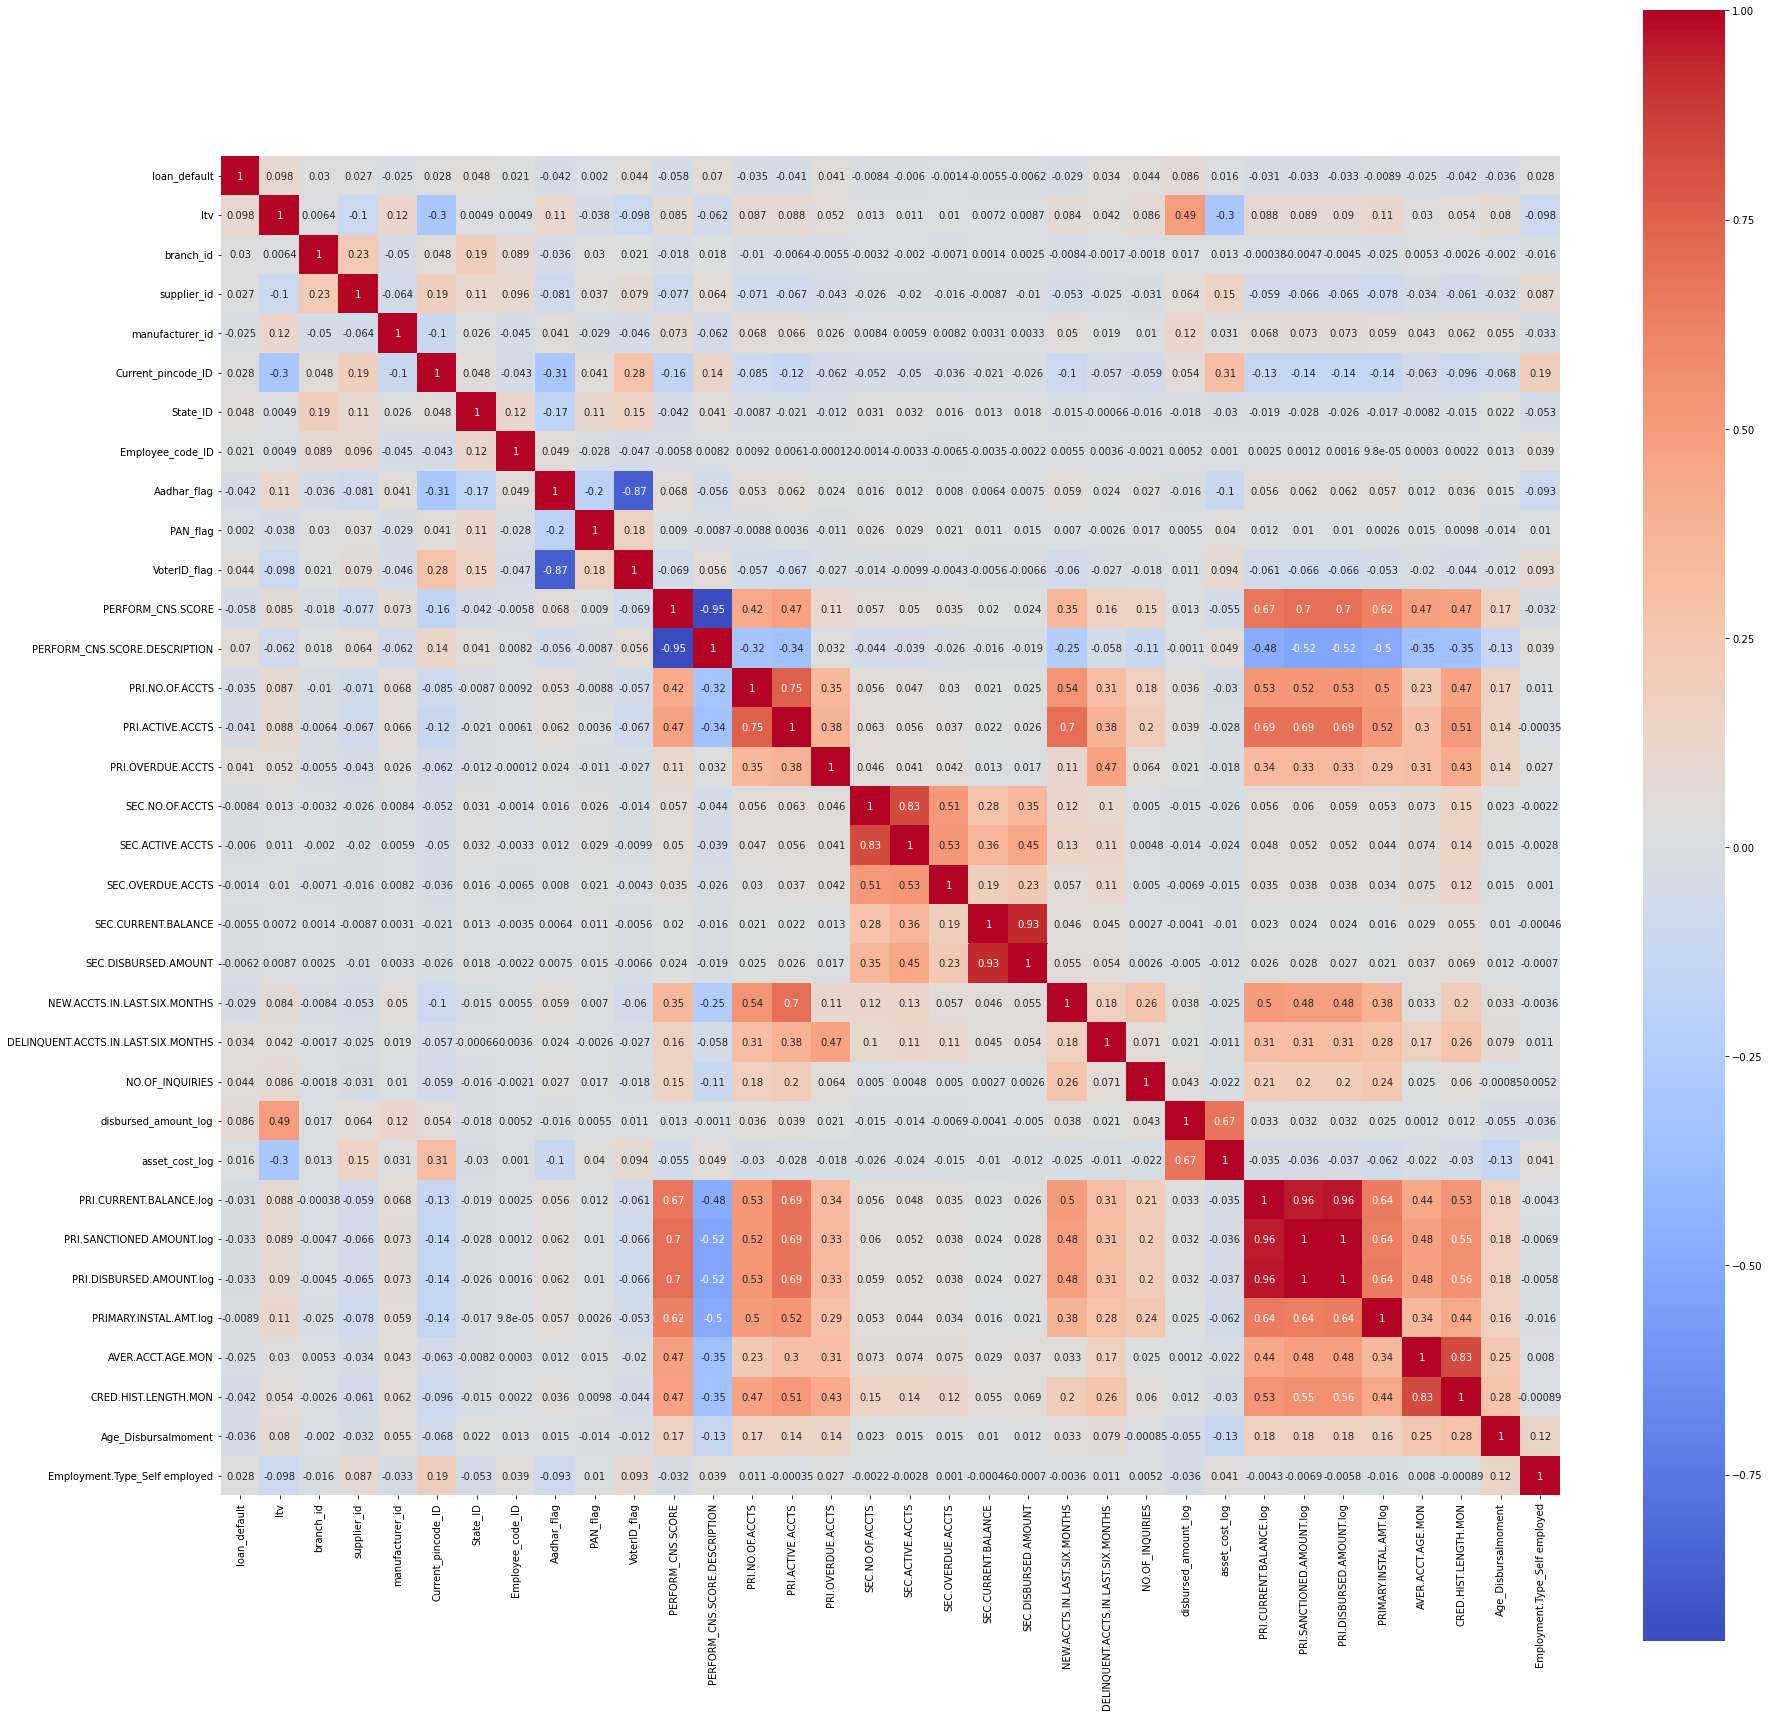

In [ ]:
import seaborn as sns
plt.figure(figsize = (30, 30))
sns.heatmap(df.corr(), annot = True, fmt='.2g', cmap = 'coolwarm', square = True)

In [ ]:
rmax = 0.5 
cor = df.corr() 
col = [] 
for i in range(len(cor.columns)): 
  for j in range(len(cor.columns)): 
    if (np.abs(cor.iloc[i, j]) > rmax) and (i != j) and (j != 0) and (i != 0): 
      if np.abs(cor['loan_default'][cor.columns[i]]) < np.abs(cor['loan_default'][cor.columns[j]]):
        col.append(cor.columns[i])
      else:
        col.append(cor.columns[j])
        
df = df.drop(list(set(col)), axis = 1) 

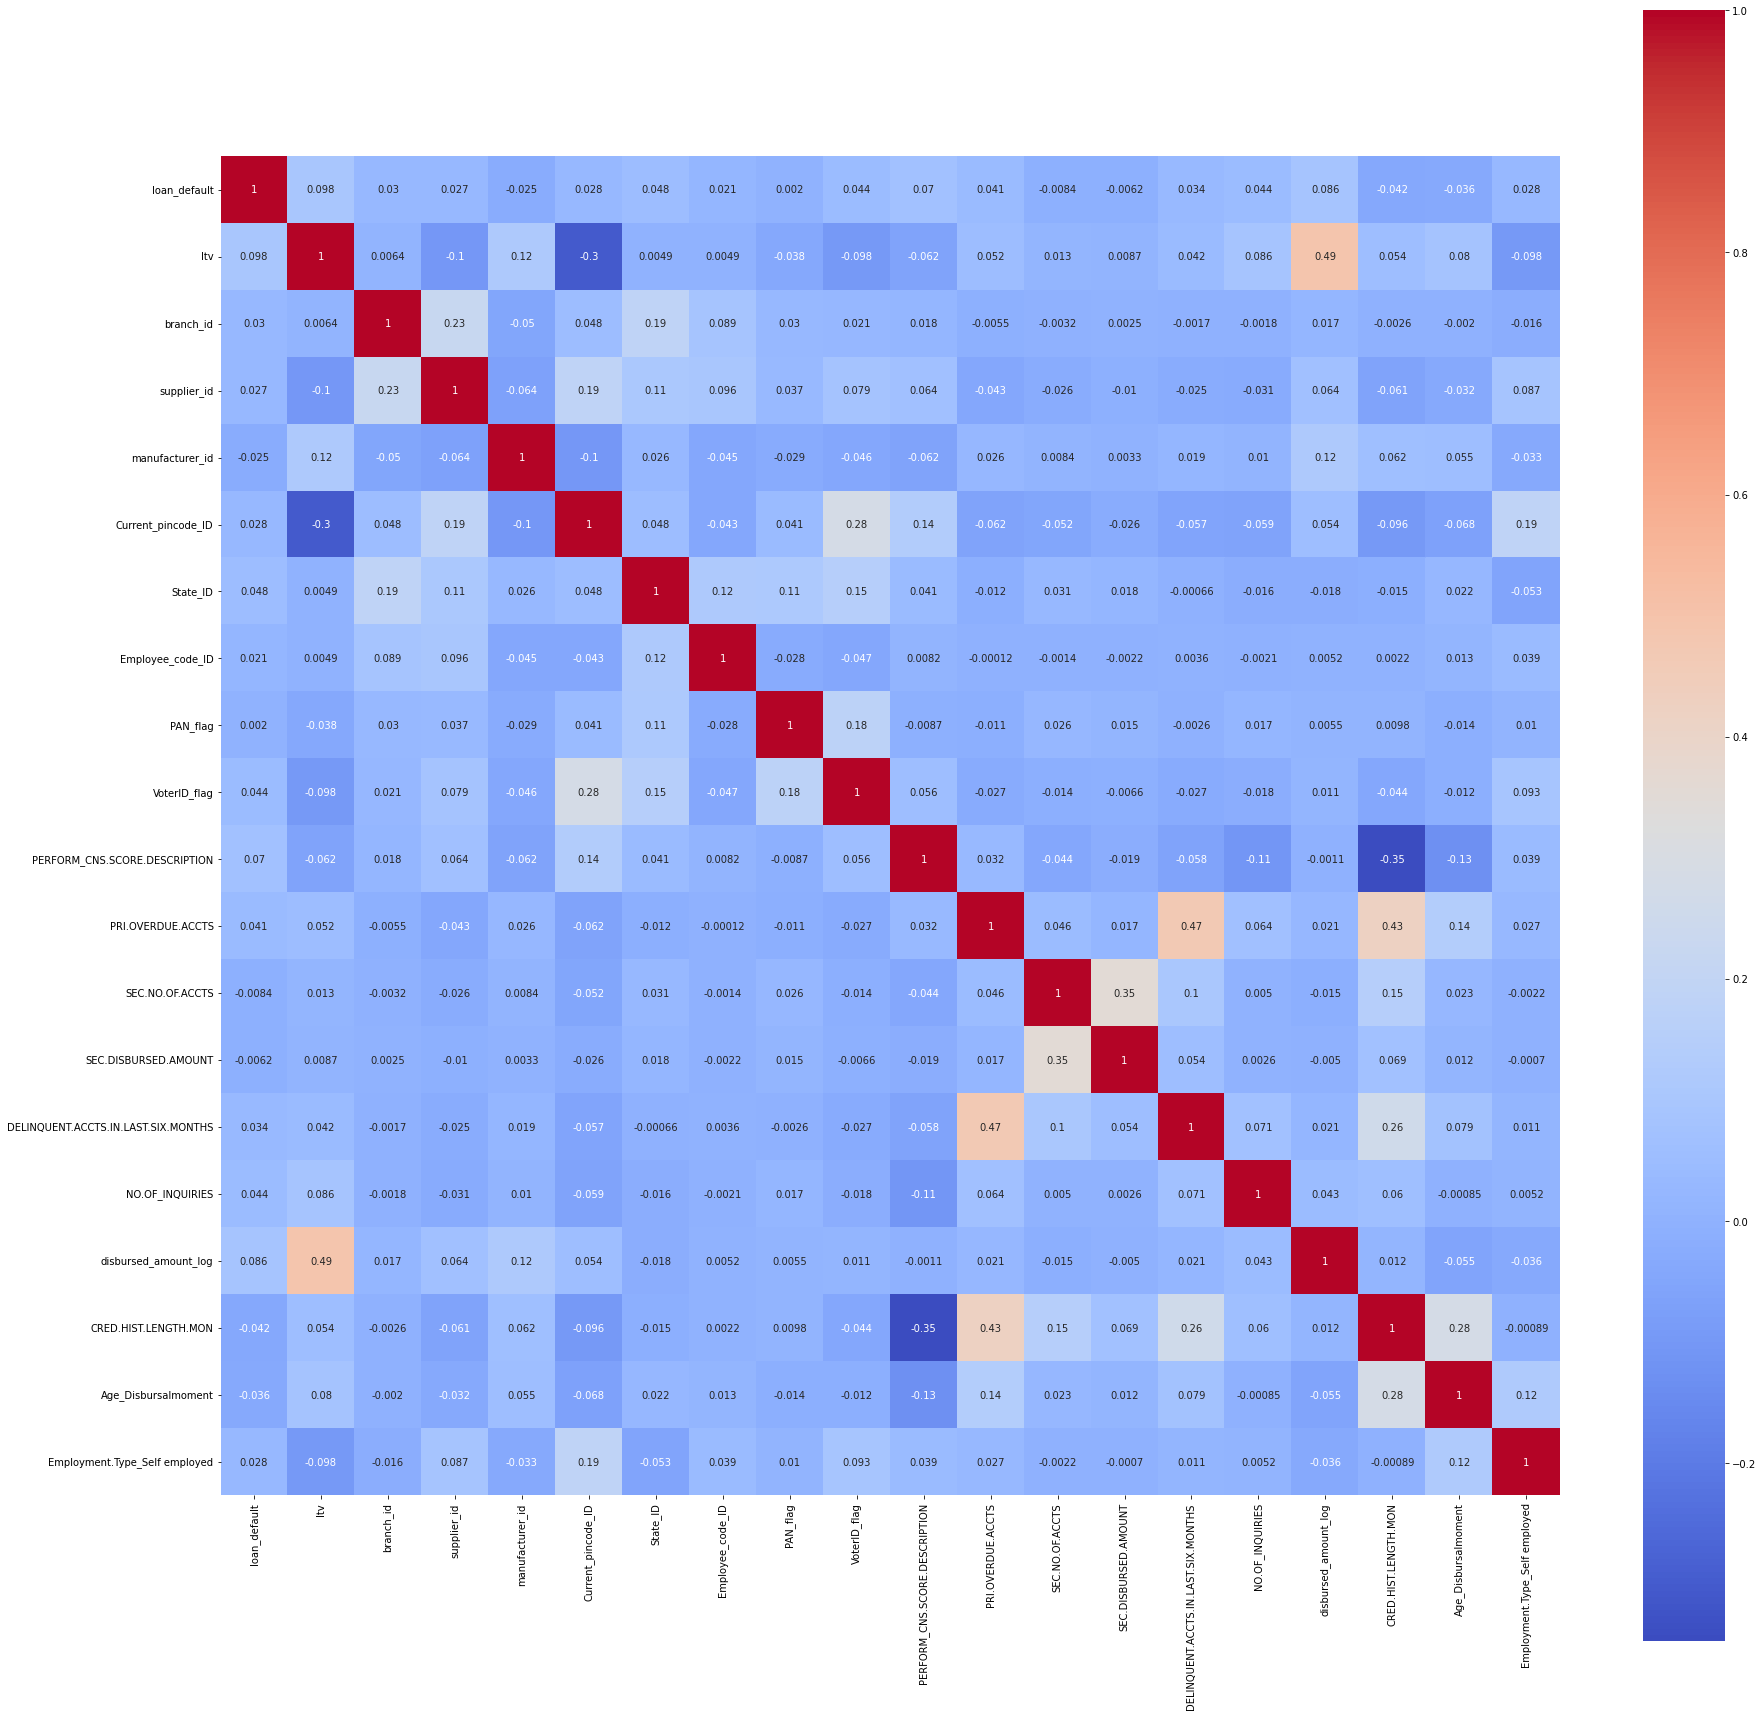

In [ ]:
plt.figure(figsize = (30, 30))
sns.heatmap(df.corr(), annot = True, fmt='.2g', cmap = 'coolwarm', square = True)

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(df.drop('loan_default', axis = 1), df['loan_default'], test_size = 0.2) 

In [ ]:
model = sm.Logit(Y_train, sm.add_constant(X_train)).fit()
print(model.summary())

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.505929
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:           loan_default   No. Observations:               186523
Model:                          Logit   Df Residuals:                   186503
Method:                           MLE   Df Model:                           19
Date:                Fri, 16 Dec 2022   Pseudo R-squ.:                 0.03259
Time:                        12:27:39   Log-Likelihood:                -94367.
converged:                       True   LL-Null:                       -97546.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -8.1688      0.307 

In [ ]:
Y_train

126077    1
216079    0
233106    0
78306     1
49220     0
         ..
216230    0
173824    1
82619     0
49197     0
82697     0
Name: loan_default, Length: 186523, dtype: int64

In [ ]:
prediction_test = model.predict(sm.add_constant(X_test)) 
prediction_test 

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


102056    0.262135
230999    0.320526
73481     0.155409
13113     0.302537
55907     0.172677
            ...   
33002     0.251023
110424    0.265362
60970     0.249751
108427    0.238987
51094     0.158113
Length: 46631, dtype: float64

In [ ]:
pmax = 0.04
train = X_train.copy()
test = X_test.copy()
model = sm.Logit(Y_train, sm.add_constant(train)).fit()

while np.max(model.pvalues[1:]) > pmax:
  train = train.drop(train.columns[np.argmax(model.pvalues[1:])], axis = 1)
  test = test.drop(test.columns[np.argmax(model.pvalues[1:])], axis = 1)
  model = sm.Logit(Y_train, sm.add_constant(train)).fit()
print(model.summary())

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.505929
         Iterations 6


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.505942
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:           loan_default   No. Observations:               186523
Model:                          Logit   Df Residuals:                   186504
Method:                           MLE   Df Model:                           18
Date:                Fri, 16 Dec 2022   Pseudo R-squ.:                 0.03256
Time:                        12:28:20   Log-Likelihood:                -94370.
converged:                       True   LL-Null:                       -97546.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -8.1667      0.307 

In [ ]:
prediction_test = model.predict(sm.add_constant(test)) 
prediction_test 

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


135924    0.285307
214716    0.128649
157956    0.087149
117908    0.185025
10450     0.091978
            ...   
181988    0.101965
81613     0.269670
35437     0.120396
7577      0.136198
63378     0.270799
Length: 46631, dtype: float64

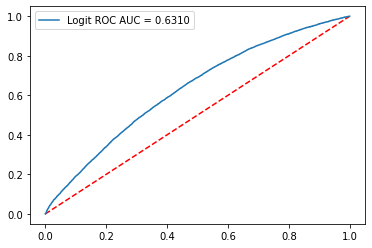

In [ ]:
logit_roc_auc = roc_auc_score(Y_test, prediction_test) 
fpr, tpr, thresholds = roc_curve(Y_test, prediction_test) 

plt.plot([0, 1], [0, 1], '--', color = 'red') 
plt.plot(fpr, tpr, label = 'Logit ROC AUC = %0.4f' %logit_roc_auc) 
plt.legend() 

[Text(0.44934131991814463, 0.9545454545454546, 'X[0] <= 72.925\ngini = 0.34\nsamples = 186523\nvalue = [146008, 40515]'),
 Text(0.2289819236016371, 0.8636363636363636, 'X[4] <= 6551.5\ngini = 0.28\nsamples = 65471\nvalue = [54459, 11012]'),
 Text(0.1416268758526603, 0.7727272727272727, 'X[16] <= 2.404\ngini = 0.25\nsamples = 50837\nvalue = [43378, 7459]'),
 Text(0.08270804911323329, 0.6818181818181818, 'X[9] <= 5.5\ngini = 0.232\nsamples = 43029\nvalue = [37278, 5751]'),
 Text(0.02660300136425648, 0.5909090909090909, 'X[17] <= 9848.5\ngini = 0.181\nsamples = 12206\nvalue = [10974, 1232]'),
 Text(0.005457025920873124, 0.5, 'X[0] <= 53.735\ngini = 0.244\nsamples = 2306\nvalue = [1978, 328]'),
 Text(0.002728512960436562, 0.4090909090909091, 'gini = 0.162\nsamples = 406\nvalue = [370, 36]'),
 Text(0.008185538881309686, 0.4090909090909091, 'X[15] <= 0.5\ngini = 0.26\nsamples = 1900\nvalue = [1608, 292]'),
 Text(0.005457025920873124, 0.3181818181818182, 'X[17] <= 8345.5\ngini = 0.245\nsample

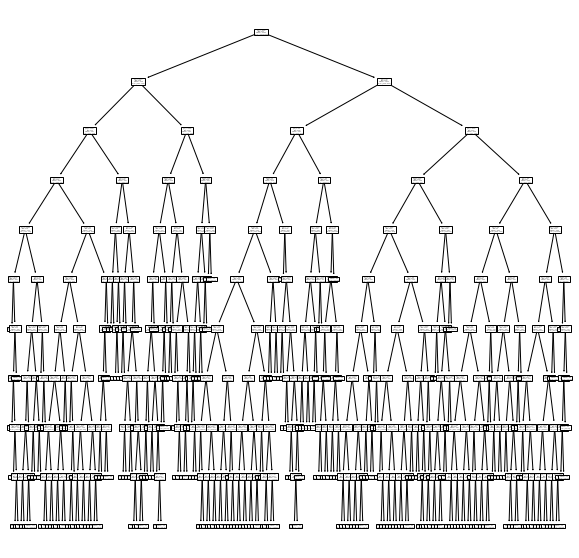

In [ ]:
from sklearn import tree 
model = tree.DecisionTreeClassifier(max_depth = 10, min_samples_split = 100, min_samples_leaf = 300).fit(X_train, Y_train) 
pred_tree_train = model.predict_proba(X_test)[:, 1] 
plt.figure(figsize = (10, 10)) 
tree.plot_tree(model) 

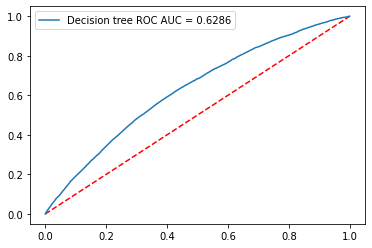

In [ ]:
tree_roc_auc = roc_auc_score(Y_test, pred_tree_train) 
fpr1, tpr1, thresholds1 = roc_curve(Y_test, pred_tree_train) 

plt.plot([0, 1], [0, 1], '--', color = 'red') 
plt.plot(fpr1, tpr1, label = 'Decision tree ROC AUC = %0.4f' %tree_roc_auc) 
plt.legend() 

In [ ]:
import sklearn
from sklearn import ensemble
model = sklearn.ensemble.RandomForestClassifier(n_estimators = 320, max_depth = 20, min_samples_leaf = 100).fit(X_train, Y_train)
pred_rf = model.predict_proba(X_test)[:, 1]

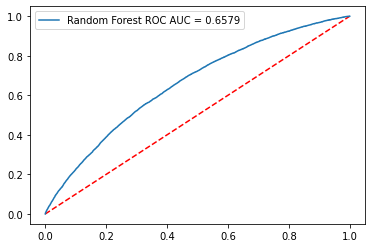

In [ ]:
rf_roc_auc = roc_auc_score(Y_test, pred_rf)
fpr2, tpr2, thresholds2 = roc_curve(Y_test, pred_rf)

plt.plot([0, 1], [0, 1], '--', color = 'red')
plt.plot(fpr2, tpr2, label = 'Random Forest ROC AUC = %0.4f' %rf_roc_auc)
plt.legend()

In [ ]:
model = sklearn.ensemble.GradientBoostingClassifier(n_estimators = 350, min_samples_split = 500, max_depth = 12, min_samples_leaf = 300, learning_rate = 0.01).fit(X_train, Y_train)
pred_gb = model.predict_proba(X_test)[:, 1]

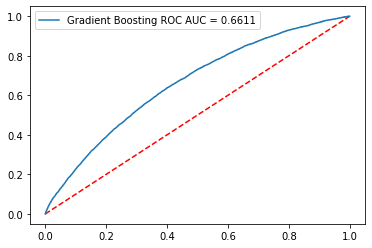

In [ ]:
gb_roc_auc = roc_auc_score(Y_test, pred_gb)
fpr3, tpr3, thresholds3 = roc_curve(Y_test, pred_gb)

plt.plot([0, 1], [0, 1], '--', color = 'red')
plt.plot(fpr3, tpr3, label = 'Gradient Boosting ROC AUC = %0.4f' %gb_roc_auc)
plt.legend()

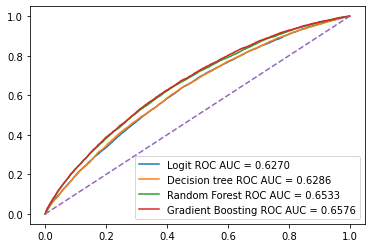

In [ ]:
plt.plot(fpr, tpr, label = 'Logit ROC AUC = %0.4f' %logit_roc_auc) 
plt.plot(fpr1, tpr1, label = 'Decision tree ROC AUC = %0.4f' %tree_roc_auc) 
plt.plot(fpr2, tpr2, label = 'Random Forest ROC AUC = %0.4f' %rf_roc_auc) 
plt.plot(fpr3, tpr3, label = 'Gradient Boosting ROC AUC = %0.4f' %gb_roc_auc) 
plt.plot([0, 1], [0, 1], linestyle = '--' )  
plt.legend()
